In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.duplicated().sum()

0

In [5]:
df['Exited'].value_counts()
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
df.drop(columns=['RowNumber','CustomerId','Surname'] , inplace = True)

In [7]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first = True)

In [8]:
 c = df.drop(columns=['Exited'])
y=df['Exited']

In [9]:
from sklearn.model_selection import train_test_split
c_train,c_test,y_train,y_test = train_test_split(c,y,test_size = 0.2,random_state=1)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

c_train_scaled = scaler.fit_transform(c_train)
c_test_scaled = scaler.transform(c_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(11,activation = 'relu',input_dim = 11))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics='accuracy')

In [17]:
history = model.fit(c_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5505 - accuracy: 0.7642 - val_loss: 0.4760 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.7998 - val_loss: 0.4357 - val_accuracy: 0.8044
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4283 - accuracy: 0.8067 - val_loss: 0.4212 - val_accuracy: 0.8156
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4158 - accuracy: 0.8195 - val_loss: 0.4097 - val_accuracy: 0.8238
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4068 - accuracy: 0.8255 - val_loss: 0.4012 - val_accuracy: 0.8256
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8305 - val_loss: 0.3936 - val_accuracy: 0.8313
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8342 - val_loss: 0.3861 - val_accuracy: 0.8325

In [18]:
model.layers[0].get_weights()

[array([[ 0.18572515,  0.49462122, -0.01484636, -0.12283221,  0.3680711 ,
          0.22160037,  0.0178857 , -0.04158568,  0.14610325,  0.10602344,
         -0.17301254],
        [-0.17837551, -0.33358535, -0.44856352, -0.2916513 , -0.96394926,
          0.11662228, -0.71254516, -0.3657294 ,  0.6002065 ,  0.7754459 ,
          0.40248403],
        [ 0.12604348, -0.11274824,  0.0126221 , -0.31887165, -0.3604475 ,
          0.02160643,  0.05614137,  0.13324663,  0.19612361, -0.1256885 ,
         -0.17390685],
        [-0.19388281, -0.14529814, -0.03001098, -0.25301313,  0.04332488,
          0.3342406 ,  0.04272168,  0.02001355,  0.05180797, -0.54406065,
          0.06324109],
        [-1.3798351 , -0.16274452, -0.19313137, -0.6770177 , -0.3232518 ,
          0.99303406,  0.01791036,  0.16078424, -0.09555089, -0.55955994,
         -0.33083853],
        [-0.14274056, -0.39483282, -0.05357077,  0.41031602,  0.66960686,
         -0.172465  , -0.13795482,  0.48808998,  0.15478231, -0.5391259

In [19]:
y_log = model.predict(c_train_scaled)

250/250 [==============================] - 0s 1ms/step


In [20]:
y_pred = np.where(y_log>0.5,1,0)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

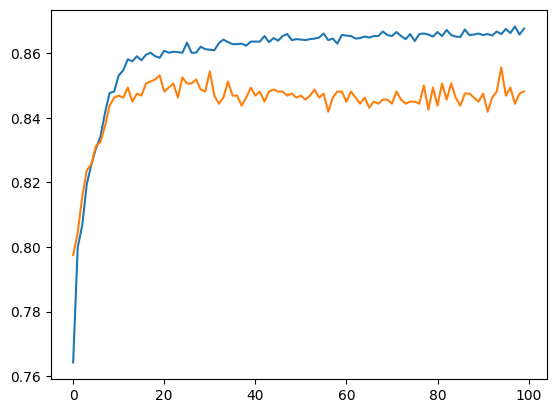

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])